In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\mourinho\Desktop\Healthcare - Diabetes\health care diabetes.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
Target = data['Outcome']
features = x = data.drop(['Outcome'], axis=1)


#### Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

In [6]:
for col in features.columns:
    val = features[col].mean()
    features[col] = features[col].replace(0, val)

In [7]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#### Visually explore these variables using histograms. Treat the missing values accordingly.

In [8]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
#there is no missing data

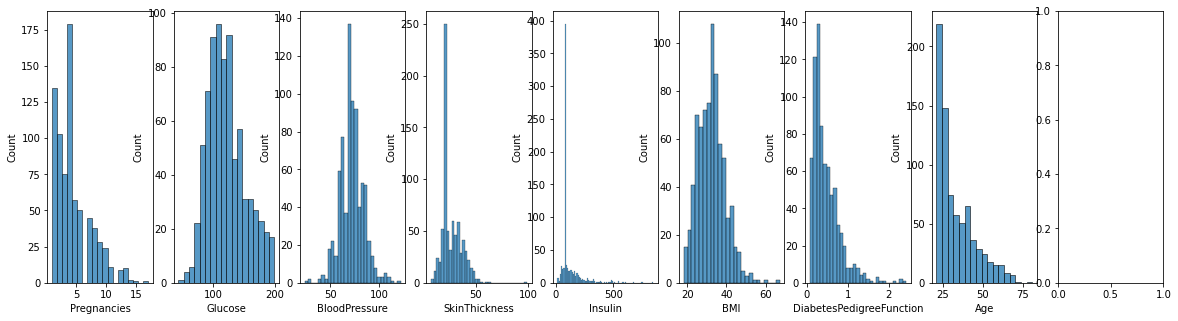

In [10]:
fig, ax = plt.subplots(1,9, figsize=(20,5))


for i, feature in enumerate(features):
  sns.histplot(features[feature], ax=ax[i])

#### There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

int64      7
float64    2
dtype: int64

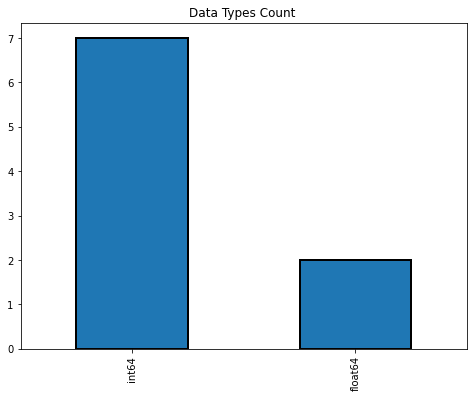

In [12]:
Frequency_plot = data.dtypes.value_counts()
Frequency_plot.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Data Types Count ")
Frequency_plot

#### Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

0    500
1    268
Name: Outcome, dtype: int64

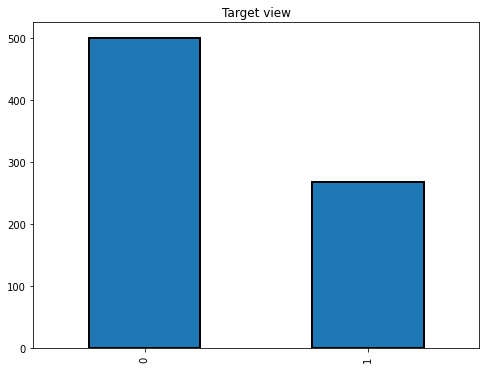

In [13]:
outcome_counts = data['Outcome'].value_counts().sort_index()
outcome_counts.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target view")
outcome_counts

<AxesSubplot:xlabel='Outcome', ylabel='count'>

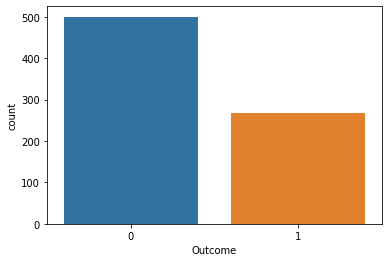

In [14]:
sns.countplot(data['Outcome'])

Kinda of Balance dataset

#### Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

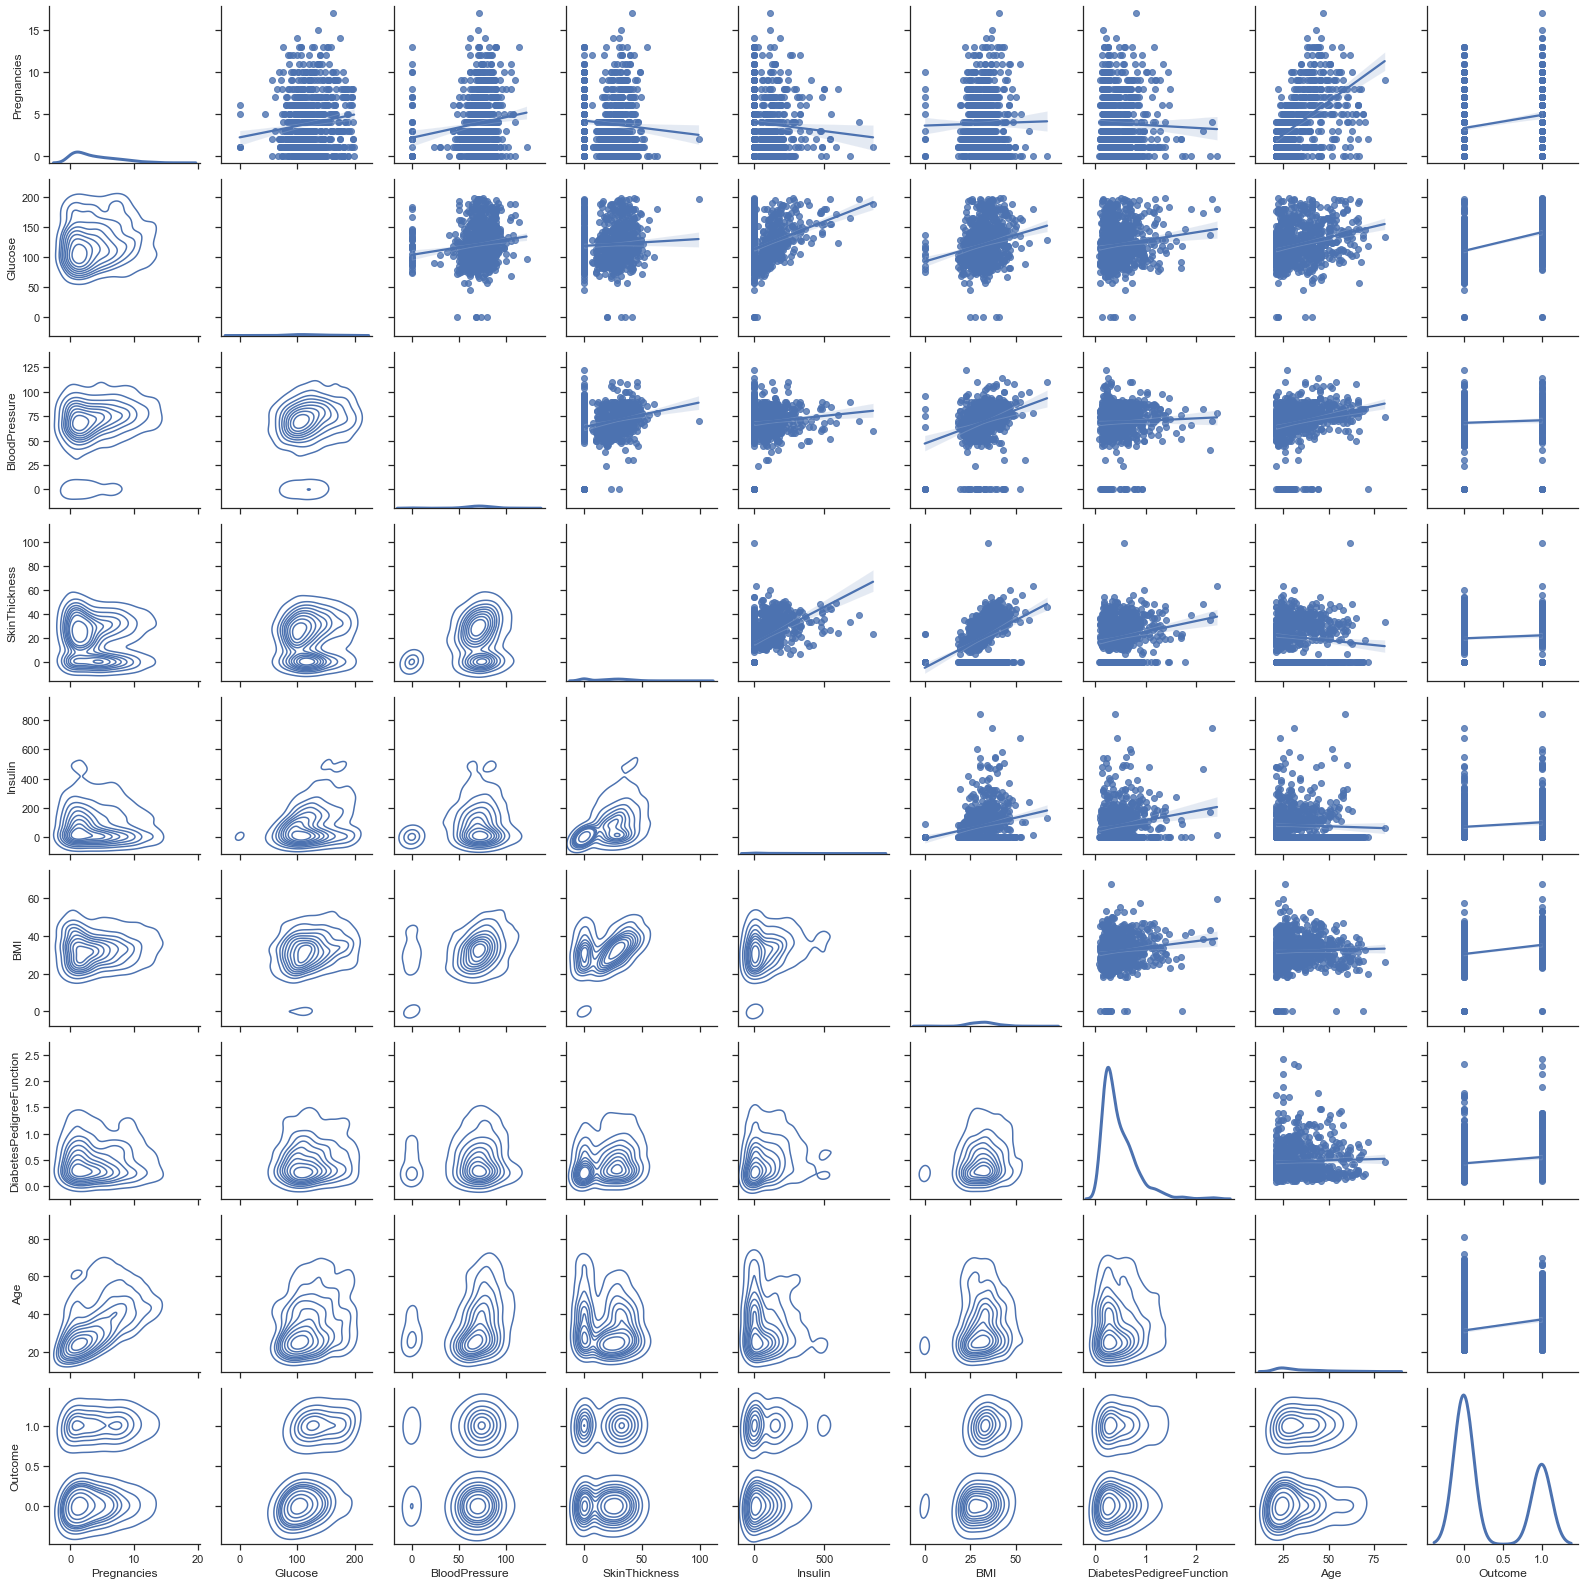

In [15]:
sns.set(style ='ticks')


g = sns.PairGrid(data, diag_sharey=True)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)

g.map_upper(sns.regplot)



#### Perform correlation analysis. Visually explore it using a heat map.

<AxesSubplot:>

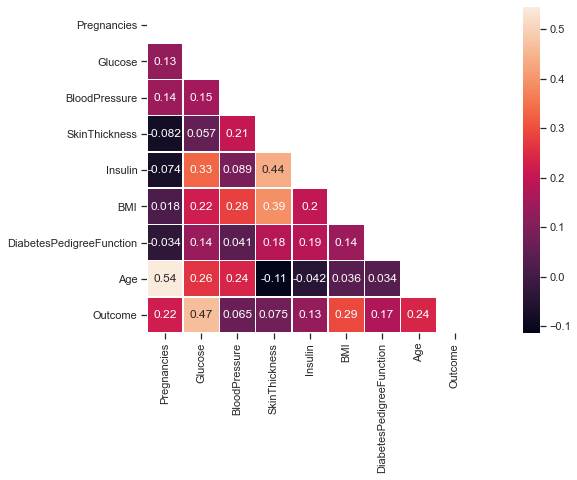

In [16]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True

plt.figure(figsize = (18,6))
sns.heatmap(corr,linewidths=.5, mask=mask, square=True, annot=True)

In [17]:
data["Outcome"].unique()

array([1, 0], dtype=int64)

In [18]:
#features That have a strongh correlation
features_samp = data[['Age','BMI','Glucose', 'Pregnancies']]

outcomes = data["Outcome"].unique()

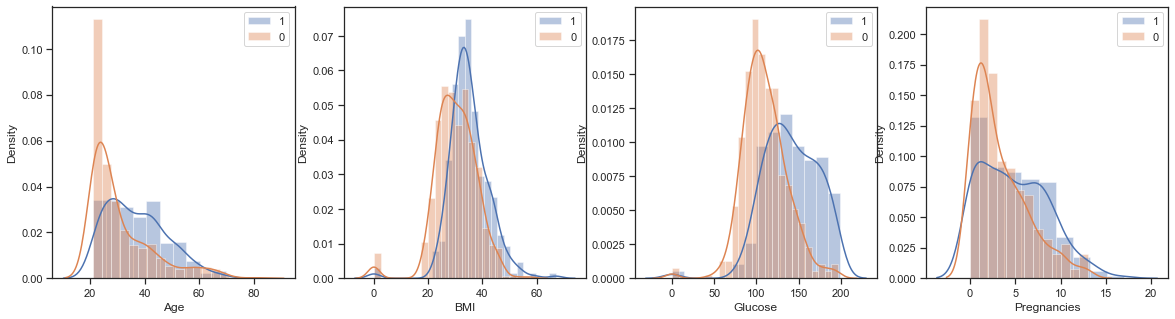

In [19]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for i, feature in enumerate(features_samp):
  for outcome in outcomes:
    subset = features_samp[data["Outcome"] == outcome]
    sns.distplot(subset[feature], ax=ax[i], label=outcome)
  ax[i].legend()

In [43]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features,Target, test_size = 0.2, random_state = 42)

In [39]:
estimators = {
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVC(),
    'KNN':KNeighborsClassifier(n_neighbors=3),
    "LogisticRegressor": LogisticRegression(),
}

In [40]:
data_models = pd.DataFrame(columns=['model', 'run_time', 'roc_auc_score', 'Accuracy'])

for key in estimators:

    print('*',key)

    start_time = time.time()

    estimator = estimators[key]
    model = estimator.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    


    scores = cross_val_score(model, 
                             x_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'roc_auc_score':round(metrics.roc_auc_score(y_test, y_pred)),
           'Accuracy':  (metrics.accuracy_score (y_test, y_pred))

           
    }

    data_models = data_models.append(row, ignore_index=True)
  

* DecisionTreeRegressor
* SVR
* KNN
* LogisticRegressor


In [41]:
data_models.head(20).sort_values(by='Accuracy', ascending=False)

,model,run_time,roc_auc_score,Accuracy
3,LogisticRegressor,0.01,1,0.772727
1,SVR,0.01,1,0.766234
0,DecisionTreeRegressor,0.0,1,0.740260
2,KNN,0.0,1,0.688312


In [44]:

hyperparameters = dict(leaf_size=list(range(1,50)),
                       n_neighbors=list(range(1,30)),
                       p=[1,2])
KNN = KNeighborsClassifier()

clf = GridSearchCV(KNN, hyperparameters, cv=5)

best_model = clf.fit(features,Target)


print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 25


In [50]:
y_pred = best_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print('roc_auc_score', metrics.roc_auc_score(y_test, y_pred))

print('accuracy_score', metrics.accuracy_score (y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

roc_auc_score 0.7434343434343434
accuracy_score 0.7792207792207793
